# Library Import

In [39]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt 
from sklearn.datasets import load_files

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Load 


In [20]:
train_dir = 'D:/Coding Projects/GitHub Projects/Metal Surface Defects Classifications/Metal-Surface-Defects-Classification/Dataset/train'
print("Train Direcorty: ",os.listdir(train_dir))
test_dir = 'D:/Coding Projects/GitHub Projects/Metal Surface Defects Classifications/Metal-Surface-Defects-Classification/Dataset/test'
print("test Direcorty: ",os.listdir(test_dir))
val_dir = 'D:/Coding Projects/GitHub Projects/Metal Surface Defects Classifications/Metal-Surface-Defects-Classification/Dataset/valid'
print("val Direcorty: ",os.listdir(val_dir))

Train Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
test Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
val Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


## Data Distribution

In [21]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))

print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))

print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12


## Pre-processing the data

In [28]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


# Model Training

In [23]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

Model definition

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [31]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=10,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 47s 876ms/step - accuracy: 0.2385 - loss: 2.0314 - val_accuracy: 0.4167 - val_loss: 1.5564
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 49s 941ms/step - accuracy: 0.4143 - loss: 1.4697 - val_accuracy: 0.7222 - val_loss: 1.1827
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 49s 950ms/step - accuracy: 0.5344 - loss: 1.2287 - val_accuracy: 0.5833 - val_loss: 1.1117
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 47s 896ms/step - accuracy: 0.6039 - loss: 1.0429 - val_accuracy: 0.7917 - val_loss: 0.6615
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 50s 959ms/step - accuracy: 0.6516 - loss: 0.9459 - val_accuracy: 0.8472 - val_loss: 0.4329
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 50s 966ms/step - accuracy: 0.7126 - loss: 0.8291 - val_accuracy: 0.8750 - val_loss: 0.4426
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 45s 862ms/step - accuracy: 0.7512 - loss: 0.7386 - val_accuracy: 0.7917 - val_loss: 0.6189
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 845ms/step - accuracy: 0.7802 - loss: 0.6251 - val_accu

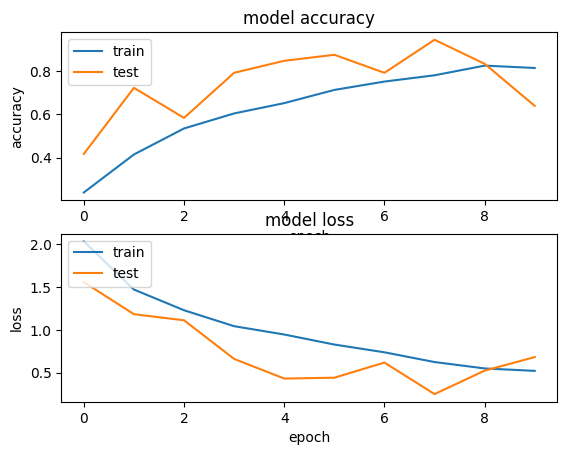

In [38]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


# Test Result visualization

In [36]:
print(test_dir)

D:/Coding Projects/GitHub Projects/Metal Surface Defects Classifications/Metal-Surface-Defects-Classification/Dataset/test


In [40]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [41]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [43]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=no_of_classes)

In [44]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [45]:
x_test = x_test.astype('float32')/255

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


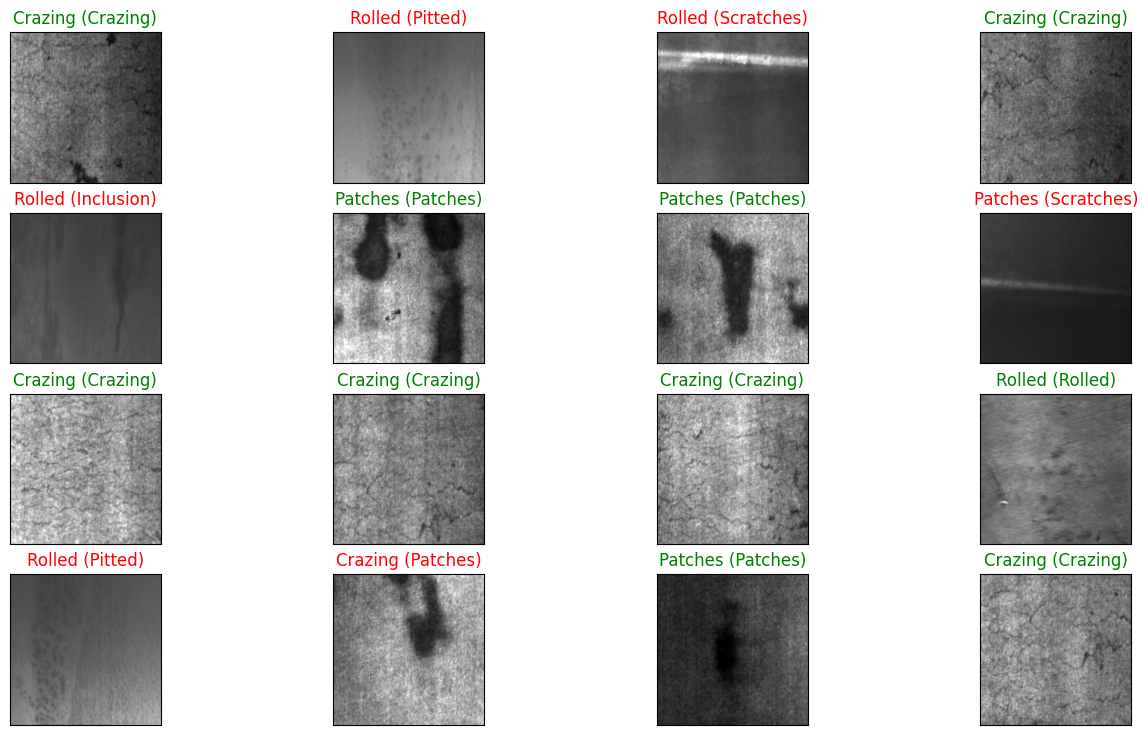

In [46]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))